Columns before removal: 
Col. 0 : TT181.PV - Gas side inlet temperature
Col. 1 : TIC215.PV - Gas side outlet temperature
Col. 2 : FI165B.PV - Gas side flow
Col. 3 : PT180.PV - Gas side compressor pressure
Col. 4 : TT069.PV - Cooling side inlet temperature
Col. 5 : PT074.PV - Cooling side pressure
Col. 6 : TIC215.OUT - Cooling side vavle opening
Col. 7 : ZT167.PV - Anti-surge unknown

Columns after removal: 
Col. 0 : TT181.PV - Gas side inlet temperature
Col. 1 : TIC215.PV - Gas side outlet temperature
Col. 2 : FI165B.PV - Gas side flow
Col. 3 : PT180.PV - Gas side compressor pressure
Col. 4 : TT069.PV - Cooling side inlet temperature
Col. 5 : PT074.PV - Cooling side pressure
Col. 6 : TIC215.OUT - Cooling side vavle opening

Finding data between 2016-04-01 00:00:00 and 2016-06-10 00:00:00
Found 4249 rows

Finding data between 2016-01-01 00:00:00 and 2020-03-01 00:00:00
Found 199345 rows

Model mlpd 1x 128 was loaded from file
Model lstmr 1x 128 was loaded from file
Training model linear

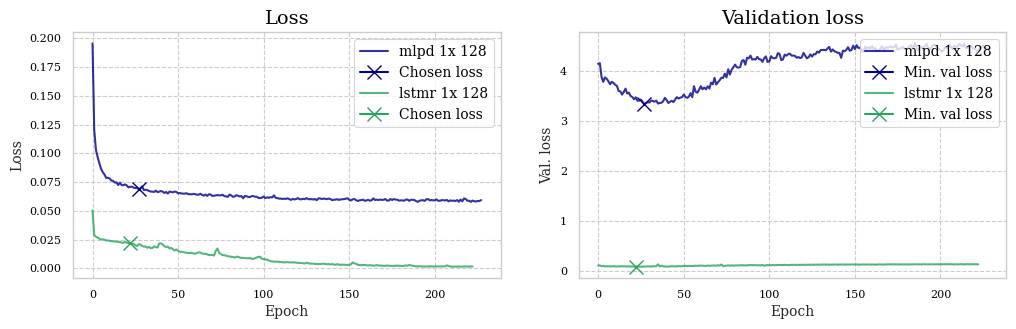

Model prediction scores
+--------------+-------------+------------+
|    Model     | Train score | Test score |
+--------------+-------------+------------+
| mlpd 1x 128  |   -0.2981   |  -3.4275   |
| lstmr 1x 128 |   -0.3531   |  -2.6342   |
|   linear r   |    0.1577   |  -2.3913   |
+--------------+-------------+------------+


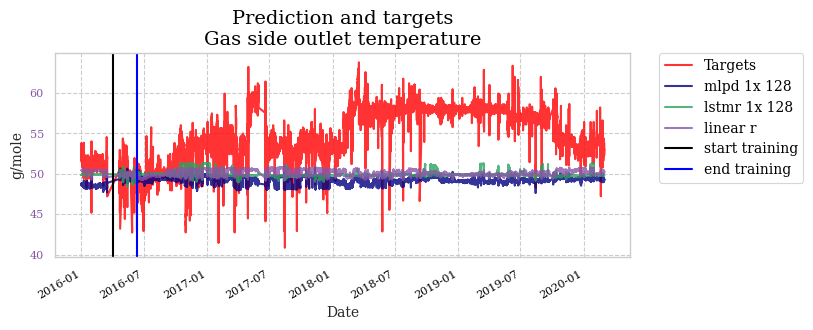

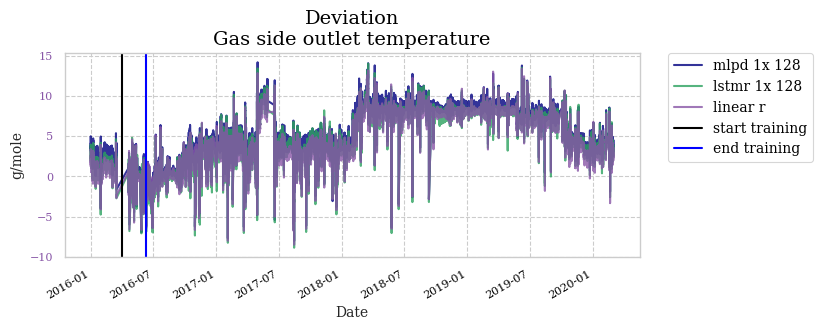

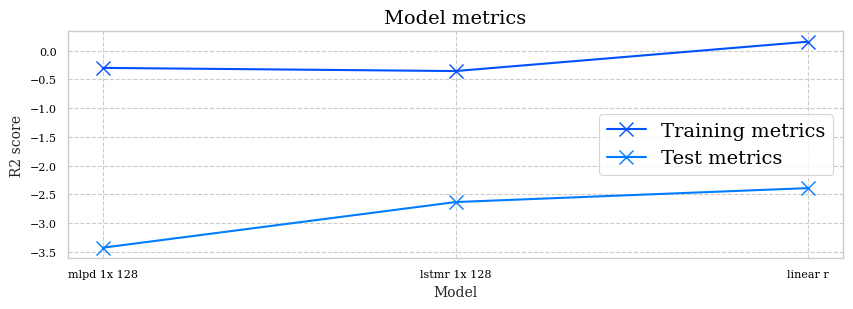

In [2]:
# %load example_dataset_B.py
import statApi
from api import Api
mlApi = Api()

# define dataset specifics
filename = "../master-thesis-db/datasets/B/data_0min.csv"

columns = [
	['TT181.PV', 'Gas side inlet temperature', 'MSm^3/d'],
	['TIC215.PV', 'Gas side outlet temperature','g/mole'],
	['FI165B.PV', 'Gas side flow', 'degrees'],
	['PT180.PV', 'Gas side compressor pressure', 'degrees'],
	['TT069.PV', 'Cooling side inlet temperature', 'degrees'],
	['PT074.PV', 'Cooling side pressure', 'degrees'],
	['TIC215.OUT', 'Cooling side vavle opening', 'degrees'],
	['XV167.CMD', 'Anti-surge compressor valve', 'degrees'],
	['XV167.ZSH', 'Anti-surge valve', 'degrees'],
	['ZT167.PV', 'Anti-surge unknown', 'Bar'],
]

irrelevantColumns = [
		'XV167.CMD',
		'XV167.ZSH',
        'ZT167.PV',
]

targetColumns = [
    'TIC215.PV',
]

traintime = [
        ["2016-04-01 00:00:00", "2016-06-10 00:00:00"],
]
	
testtime = [
        "2016-01-01 00:00:00",
		"2020-03-01 00:00:00",
	]

df = mlApi.initDataframe(filename, columns, irrelevantColumns)
df_train, df_test = mlApi.getTestTrainSplit(traintime, testtime)
X_train, y_train, X_test, y_test = mlApi.getFeatureTargetSplit(targetColumns)

mlpd_1x_128 = mlApi.MLP('mlpd 1x 128', layers=[128], dropout=0.2)
lstmd_1x_128 = mlApi.LSTM('lstmr 1x 128', layers=[128], dropout=0.2, recurrentDropout=0.2)

linear = mlApi.Linear('linear')
linear_r = mlApi.Linear_Regularized('linear r')

modelList = [
	mlpd_1x_128,
	lstmd_1x_128,
	#linear,
	linear_r,
]

mlApi.initModels(modelList)
retrain=False
mlApi.trainModels(retrain)
modelNames, metrics_train, metrics_test, columnsList, deviationsList = mlApi.predictWithModels(
	plot=True,
	interpol=False,
)